# Implement the K-means clustering algorithm on a synthetic data set


In [24]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import seaborn as sns
from google.colab import files
from sklearn import preprocessing
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings("ignore")

# Data Exploring
We will read data from X.dat data file into an dataframe object.

In [25]:
data = pd.read_csv("X.dat", header=None)
data.columns=["column"]

#Replace three consecutive spaces (" ") a single space (" ")
data['column']=data['column'].str.replace('   ',' ')

#Replace two consecutive spaces (" ") a single space (" ")
data['column']=data['column'].str.replace('  ',' ')
data.head()

,column
0,3.5978900e-02 4.4233337e-01
1,1.9294669e-01 1.4128984e-01
2,1.7896478e-01 4.0775660e-01
3,3.9697187e-01 -4.1777655e-01
4,-2.9123800e-03 5.3764335e-02


# Data Pre-processing
Split the column based on spaces and then rename the columns.

In [26]:
data=data['column'].str.split(' ', expand=True)
len(data.columns)

3

In [27]:
data.columns=["0","x","y"]
data.drop('0', inplace=True, axis=1)
data.head()

,x,y
0,3.5978900e-02,4.4233337e-01
1,1.9294669e-01,1.4128984e-01
2,1.7896478e-01,4.0775660e-01
3,3.9697187e-01,-4.1777655e-01
4,-2.9123800e-03,5.3764335e-02


In [28]:
# We will write the updated data frame into an CSV file which will be used for further pre-processing.
data.to_csv('X.csv')
type(data)

pandas.core.frame.DataFrame

In [29]:
# The data types are stored as a Series object, which is a one-dimensional labeled array.
datatypeSeries= data.dtypes[0:1]
print(datatypeSeries)

x    object
dtype: object


In [30]:
""" We will create a dictionary which will map column names to desired data types.
Then we will change data type to float for data in every column.
"""
dict_columns_type = {'x': float,
                'y': float
               }

data = data.astype(dict_columns_type)
print('dataframe str to float:\n',data)

print(f'\n {data.dtypes}')

dataframe str to float:
              x         y
0     0.035979  0.442333
1     0.192947  0.141290
2     0.178965  0.407757
3     0.396972 -0.417777
4    -0.002912  0.053764
...        ...       ...
4995 -0.825417 -0.058194
4996  0.166103  0.462144
4997  0.309057  0.310311
4998 -0.537927  0.312275
4999  0.629773 -0.142241

[5000 rows x 2 columns]

 x    float64
y    float64
dtype: object


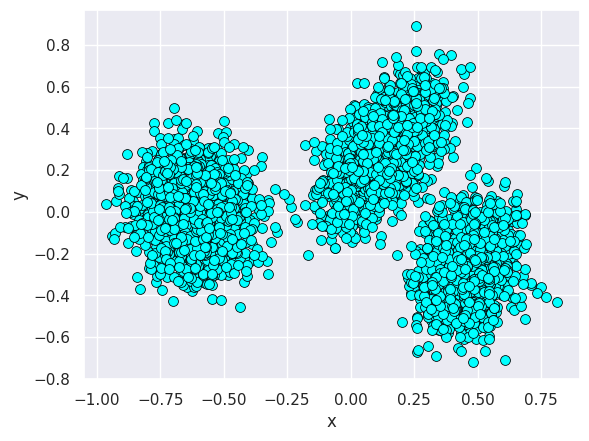

In [35]:
# We create a scatter plot for 2 X columns from our data frame.

X = data.values
sns.scatterplot(x=X[:,0], y=X[:,1], color='cyan', edgecolor='black', s=50)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Implementing K-means function
We will build the logic on which k-means algorithm runs. We will feed our data from pre-processed dataframe. Generate random value for centroid within range of our data. Find euclidean distance between our centroids and data point and select the min distance.

For each cluster index, it calculates the mean of the data points that are assigned to that cluster. The calculated mean becomes the updated centroid for the corresponding cluster, and it is appended to the centroids list. Stacks the updated centroid values vertically to form the final centroid array.

Compute the Euclidean distance between each data point in X and the final centroids. Assigns each data point to the closest centroid using the final centroid positions. Finally, the function returns the updated centroid positions (centroids) and the assigned cluster indices for each data point (points).



In [36]:
def kmeans(X,k):
    idx = np.random.choice(len(X), k, replace=False)
    centroids = X[idx, :] #SChossing randome points as centroids
    distances = cdist(X, centroids ,'euclidean') #Finding the distance between centroids and data points
    points = np.array([np.argmin(i) for i in distances]) #Finding centroid with min distance
    centroids = []
    for idx in range(k):
        temp_cent = X[points==idx].mean(axis=0) #updating the centroids based on the mean of the clusters
        centroids.append(temp_cent)
    centroids = np.vstack(centroids) #Updated value of Centroids

    distances = cdist(X, centroids ,'euclidean')
    points = np.array([np.argmin(i) for i in distances])

    return centroids,points

# PLOTTING CLUSTERS


In [84]:
"""this function by passing your data matrix X and the desired value of k.
It will perform the K-means clustering, visualize the data points in different colors based on their assigned clusters,
and plot the centroids as yellow-colored diamonds.
"""
def visualize_clusters(X, k):
    centroids, labels = kmeans(X, k)

    # Create a scatter plot for each cluster
    for cluster_label in range(k):
        filtered_data = X[labels == cluster_label]
        plt.scatter(filtered_data[:, 0], filtered_data[:, 1])

    # Plot the centroids as yellow-colored points
    plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='*')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'K-Means Clustering with k={k}')
    plt.show()




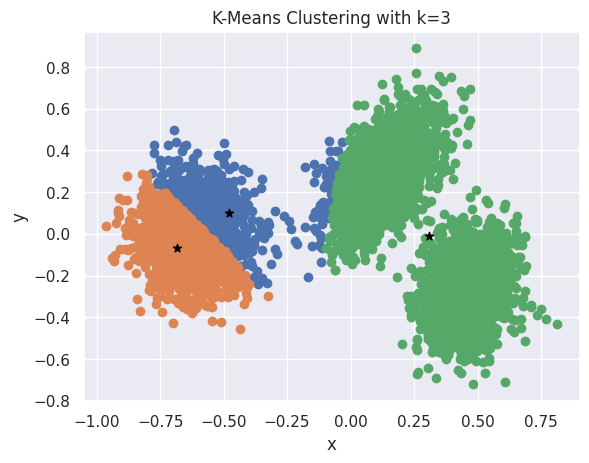

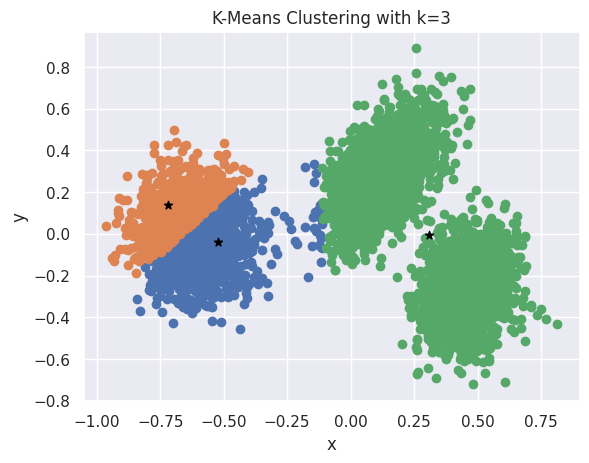

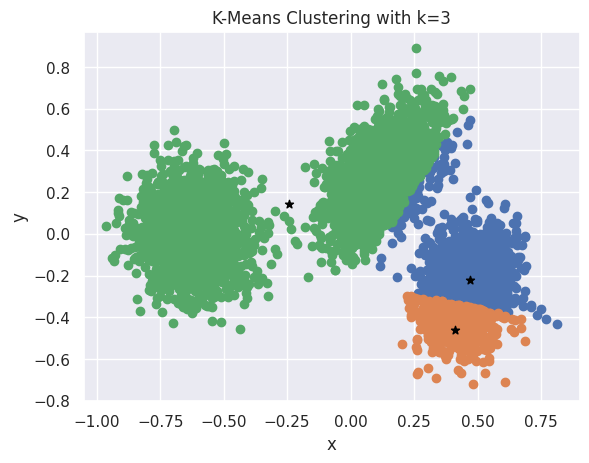

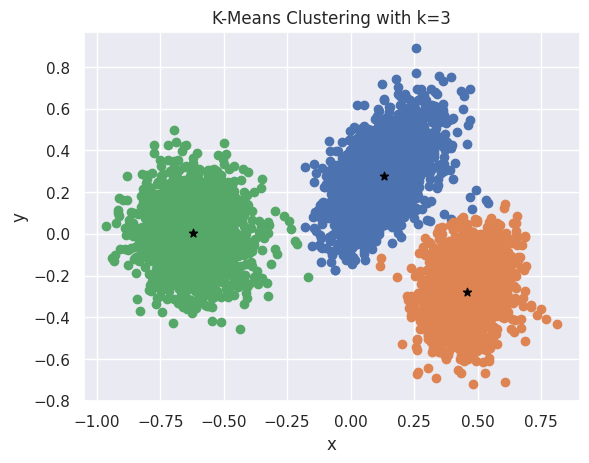

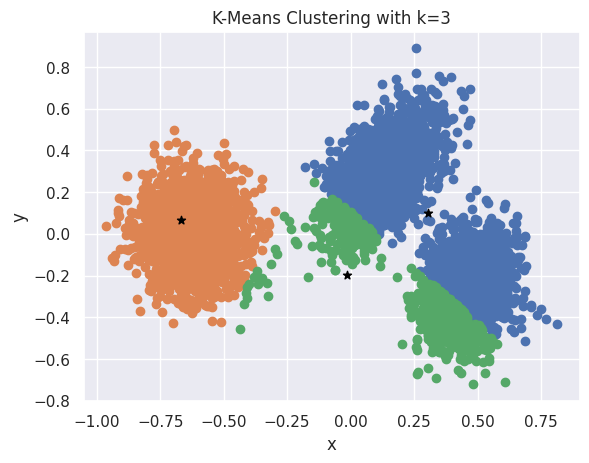

In [85]:
k = 3
i = 0
while i <= k+1:
  visualize_clusters(X, k)
  i += 1

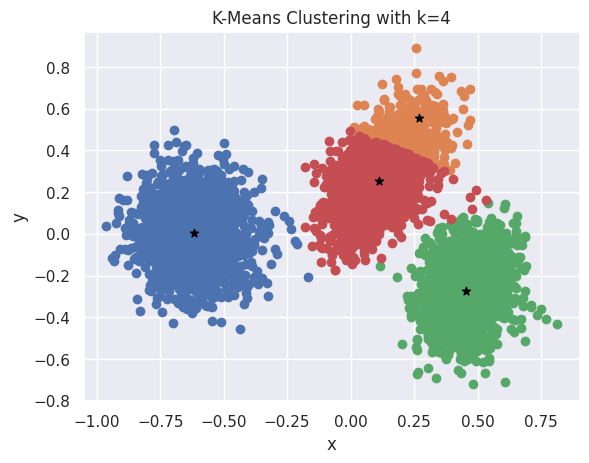

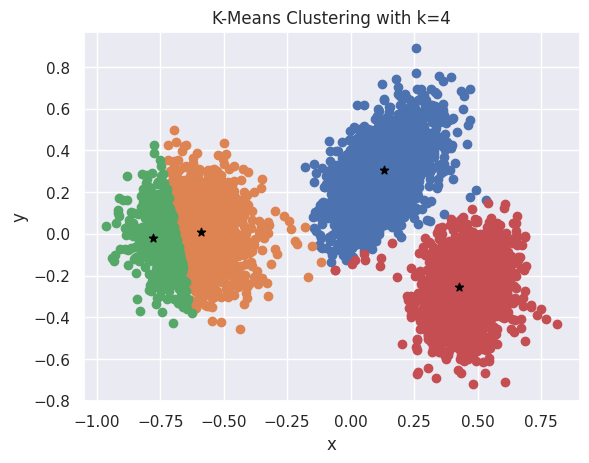

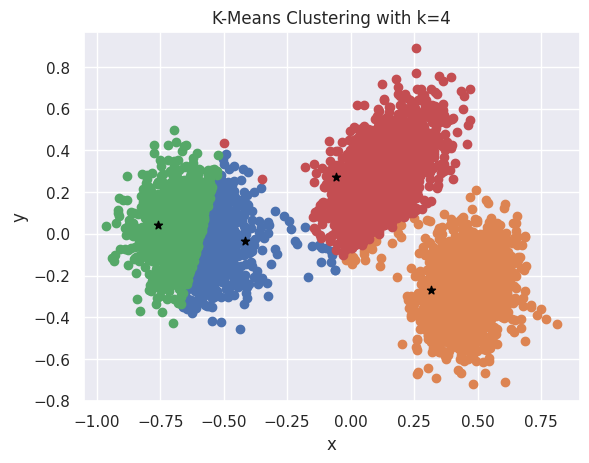

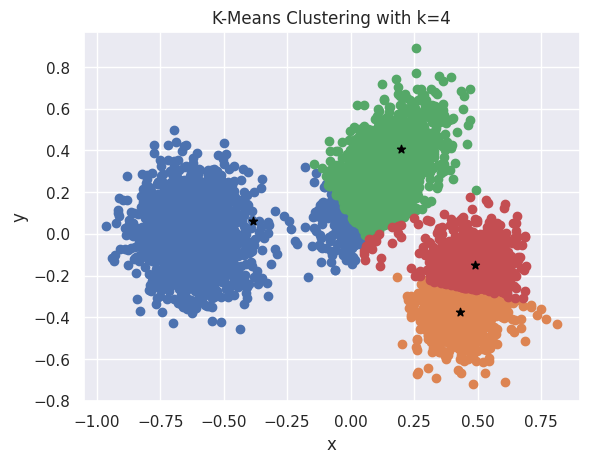

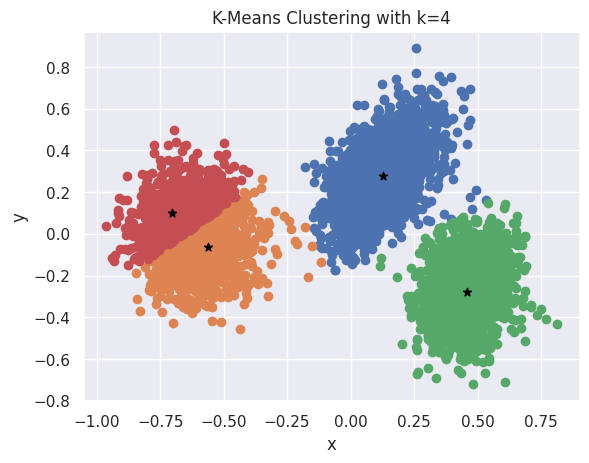

In [86]:
k = 4
i = 0
while i <= k:
  visualize_clusters(X, k)
  i += 1

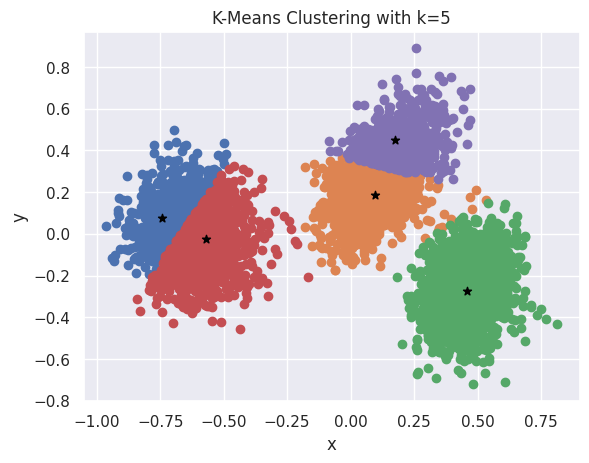

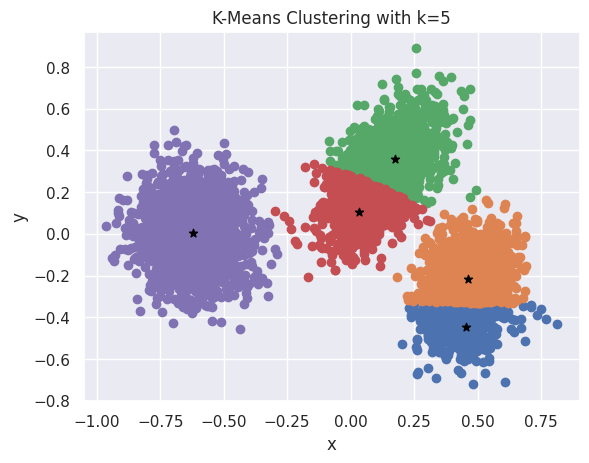

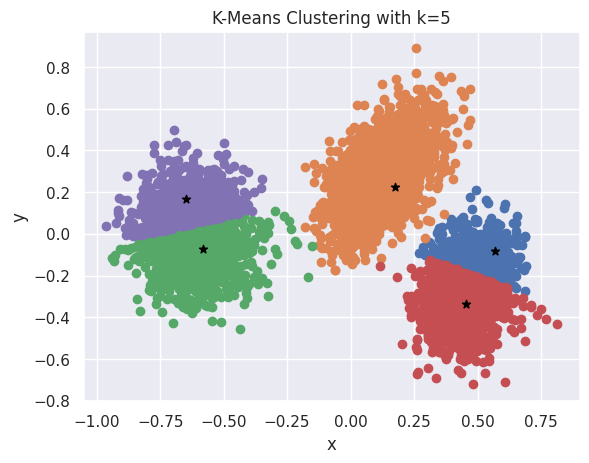

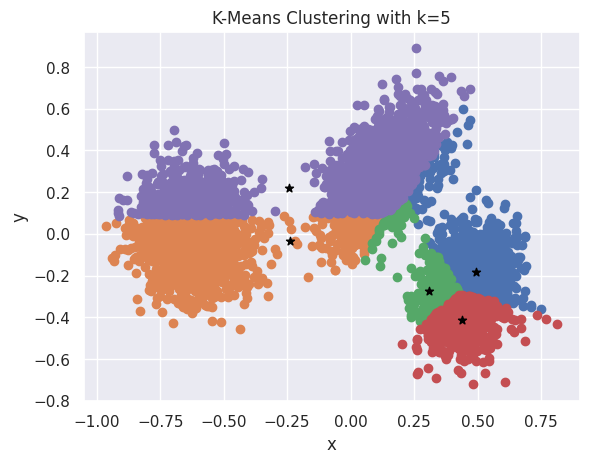

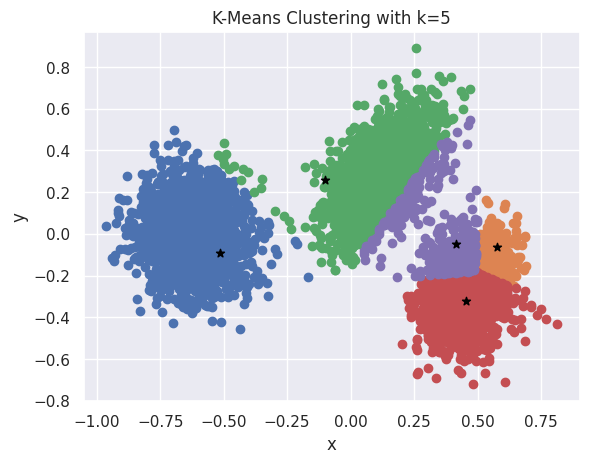

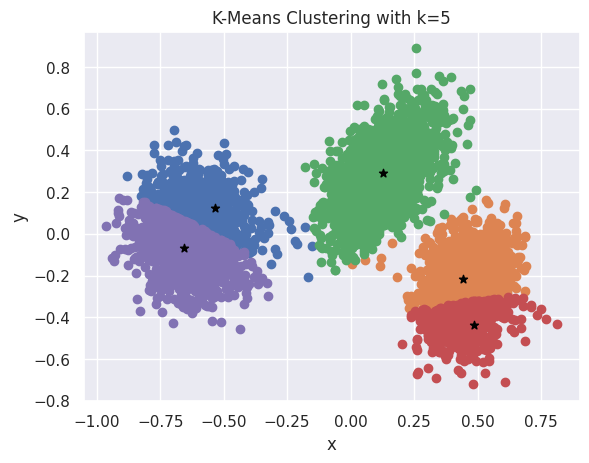

In [87]:
k = 5
i = 0
while i <= k:
  visualize_clusters(X, k)
  i += 1